In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [3]:
# basic auto encoder
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 4, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, 2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
#load MNIST data
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load dataset
train_dataset = torchvision.datasets.FashionMNIST(root='C:\\Abhishek_Data\\Datasets', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.FashionMNIST(root='C:\\Abhishek_Data\\Datasets', train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [7]:
# Initialize model, loss function, and optimizer
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model     = ConvAutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for images, _ in train_loader:
        images = images.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training Complete!")

Epoch [1/100], Loss: 0.0176
Epoch [2/100], Loss: 0.0146
Epoch [3/100], Loss: 0.0161
Epoch [4/100], Loss: 0.0153
Epoch [5/100], Loss: 0.0132
Epoch [6/100], Loss: 0.0138
Epoch [7/100], Loss: 0.0128
Epoch [8/100], Loss: 0.0135
Epoch [9/100], Loss: 0.0126
Epoch [10/100], Loss: 0.0120
Epoch [11/100], Loss: 0.0107
Epoch [12/100], Loss: 0.0116
Epoch [13/100], Loss: 0.0121
Epoch [14/100], Loss: 0.0112
Epoch [15/100], Loss: 0.0125
Epoch [16/100], Loss: 0.0140
Epoch [17/100], Loss: 0.0125
Epoch [18/100], Loss: 0.0107
Epoch [19/100], Loss: 0.0115
Epoch [20/100], Loss: 0.0105
Epoch [21/100], Loss: 0.0103
Epoch [22/100], Loss: 0.0101
Epoch [23/100], Loss: 0.0126
Epoch [24/100], Loss: 0.0126
Epoch [25/100], Loss: 0.0094
Epoch [26/100], Loss: 0.0103
Epoch [27/100], Loss: 0.0107
Epoch [28/100], Loss: 0.0103
Epoch [29/100], Loss: 0.0124
Epoch [30/100], Loss: 0.0101
Epoch [31/100], Loss: 0.0101
Epoch [32/100], Loss: 0.0113
Epoch [33/100], Loss: 0.0099
Epoch [34/100], Loss: 0.0116
Epoch [35/100], Loss: 0

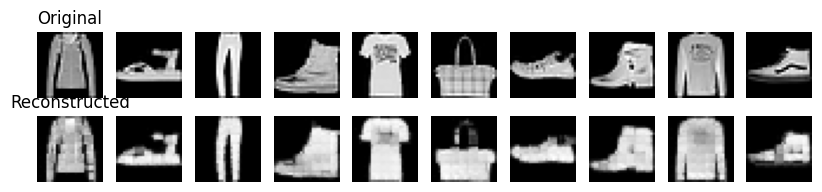

In [8]:
# Get some test images
test_images, _ = next(iter(train_loader))
test_images = test_images[:10].to(device)

# Get reconstructed images
with torch.no_grad():
    reconstructed = model(test_images)

# Plot original vs reconstructed
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow((test_images[i].cpu().squeeze()), cmap='gray')
    axes[1, i].imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].axis('off')

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()